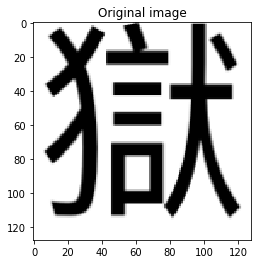

In [13]:
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import argparse
import cv2
import os
 
img_encoding = 21121
img_path = "pingfang/val/Identity." + str(img_encoding) + ".png"
preproc = "thresh"

# load the example image and convert it to grayscale
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)
plt.title('Original image')
plt.show()


In [14]:
# check to see if we should apply thresholding to preprocess the
# image
if preproc == "thresh":
    gray = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
         
# make a check to see if median blurring should be done to remove
# noise
elif preproc == "blur":
    gray = cv2.medianBlur(gray, 3)
             
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

print(filename)

1772.png


text: 獄
b'\xe7\x8d\x84'


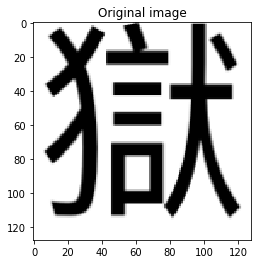

In [15]:
# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
text = pytesseract.image_to_string(Image.open(filename), lang='chi_tra', config='--psm 10')
os.remove(filename)
print("text: " + text)
print(text.encode('utf-8'))
 
plt.imshow(image)
plt.title('Original image')
plt.show()

In [20]:
a = bin(29508)
print(a)
a = a[0:2] + '0'*(18 - len(a)) + a[2:]
x = bin(int.from_bytes(text.encode(), 'big'))
print(x)
s = x[0:2] + x[6:10] + x[12:18] + x[20:26]
print(s)
print(a==s)

0b111001101000100
0b111001111000110110000100
0b0111001101000100
True


In [17]:
with open('cus2uni_encoding.txt') as f:
    cus_uni = f.readlines()
cus_uni = [x.strip() for x in cus_uni]
print(cus_uni)

['10001 14868', '10002 14869', '1001 12508', '10011 14878', '10012 14879', '1002 12509', '10021 14888', '10022 14889', '10031 -1', '10032 14899', '10041 14908', '10042 14909', '10051 -1', '10052 14919', '10061 -1', '10062 14929', '10071 -1', '10072 14939', '10081 -1', '10082 14949', '10091 14958', '10092 -1', '101 162', '10101 14969', '10102 -1', '1011 12518', '10111 14979', '10112 -1', '1012 12519', '10121 -1', '10122 -1', '10131 14999', '10132 15000', '10141 -1', '10142 -1', '10151 15019', '10152 -1', '10161 15029', '10162 15030', '10171 15039', '10172 15040', '10181 15049', '10182 15050', '10191 15059', '10192 15060', '102 163', '10201 -1', '10202 15070', '1021 12528', '10211 -1', '10212 15080', '1022 12529', '10221 15089', '10222 15090', '10231 15099', '10232 15100', '10241 15109', '10242 15110', '10251 15119', '10252 -1', '10261 -1', '10262 -1', '10271 15139', '10272 15140', '10281 -1', '10282 15150', '10291 15159', '10292 -1', '10301 15169', '10302 15170', '1031 12549', '10311 -1

In [31]:
count_total = 0
count_acc = 0
for e in cus_uni:
    cus, uni = e.split(' ')
    if uni != '-1':
        print('cus, uni: ', cus, uni)
        img_encoding = cus
        img_path = "pingfang/val/Identity." + img_encoding + ".png"
        preproc = "thresh"
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if preproc == "thresh":
            gray = cv2.threshold(gray, 0, 255,
            cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

        elif preproc == "blur":
            gray = cv2.medianBlur(gray, 3)

        filename = "{}.png".format(os.getpid())
        cv2.imwrite(filename, gray)

        text = pytesseract.image_to_string(Image.open(filename), lang='chi_tra', config='--psm 10')
        os.remove(filename)
        if len(text) != 0:
            print("text: " + text)
            count_acc += 1
#             a = bin(int(uni))
#             a = a[0:2] + '0'*(18 - len(a)) + a[2:]
#             x = bin(int.from_bytes(text.encode(), 'big'))
#             s = x[0:2] + x[6:10] + x[12:18] + x[20:26]
#             print("a, s = ", a, s)
#             if a == s:
#                 count_acc += 1
        count_total += 1
        
print('OCR_acc: ', count_acc/count_total)

cus, uni:  10001 14868
cus, uni:  10002 14869
cus, uni:  1001 12508
cus, uni:  10011 14878
cus, uni:  10012 14879
cus, uni:  1002 12509
cus, uni:  10021 14888
cus, uni:  10022 14889
text: 搪
cus, uni:  10032 14899
text: 孑
cus, uni:  10041 14908
text: 鴨
cus, uni:  10042 14909
text: 于

田

u
cus, uni:  10052 14919
cus, uni:  10062 14929
text: ‧_‧_‧_I
cus, uni:  10072 14939
text: 擂
cus, uni:  10082 14949
cus, uni:  10091 14958
text: 捧
cus, uni:  101 162
cus, uni:  10101 14969
cus, uni:  1011 12518
cus, uni:  10111 14979
text: 可支
cus, uni:  1012 12519
cus, uni:  10131 14999
text: 口
cus, uni:  10132 15000
text: 斂
cus, uni:  10151 15019
cus, uni:  10161 15029
cus, uni:  10162 15030
text: 百斗
cus, uni:  10171 15039
cus, uni:  10172 15040
cus, uni:  10181 15049
cus, uni:  10182 15050
cus, uni:  10191 15059
cus, uni:  10192 15060
cus, uni:  102 163
cus, uni:  10202 15070
cus, uni:  1021 12528
cus, uni:  10212 15080
cus, uni:  1022 12529
cus, uni:  10221 15089
cus, uni:  10222 15090
cus, uni:  1023

Content: 40.88%